In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import rc 

rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

In [2]:
eda_df = pd.read_csv('data/eda.csv', index_col=0)

eda_df.head()

,spId,card_name,season_name,cleaned_season_name,season_card,spPosition,spGrade,shoot,effectiveShoot,assist,...,ballPossesionSuccess,aerialTry,aerialSuccess,blockTry,block,tackleTry,tackle,yellowCards,redCards,spRating
0,246168651,이반 라키티치,UP (Unsung Players),UP,UP 이반 라키티치,11,8,1,1,0,...,0,0,0,1,0,0,0,0,0,6.9
0,810199564,세르지 로베르토,23 UCL (23 UEFA Champions League),23 UCL,23 UCL 세르지 로베르토,3,8,0,0,0,...,0,1,1,0,0,0,0,0,0,5.2
0,814204525,이니고 마르티네스,UT (Unexpected Transfer),UT,UT 이니고 마르티네스,6,8,0,0,0,...,1,0,0,2,0,1,1,0,0,5.6
0,827005589,루이스 피구,BDO (Ballon d'Or),BDO,BDO 루이스 피구,20,5,2,1,2,...,1,2,1,0,0,1,0,0,0,8.0
0,268001620,에마뉘엘 프티,LN (LEGENDARY NUMBERS),LN,LN 에마뉘엘 프티,28,8,1,1,0,...,3,1,0,0,0,1,0,0,0,7.8


In [3]:
eda_df['card_name'].value_counts().reset_index().head(10)

,card_name,count
0,안토니오 뤼디거,252
1,루드 굴리트,220
2,버질 반다이크,211
3,요한 크루이프,190
4,로타어 마테우스,160
5,티보 쿠르투아,143
6,스티븐 제라드,127
7,데이비드 알라바,123
8,주앙 칸셀루,120
9,데일리 블린트,115


In [4]:
eda_df['season_name'].value_counts().reset_index().head(10)

,season_name,count
0,23 UCL (23 UEFA Champions League),1488
1,CU (Champions of Europe),1352
2,24EP (2024 Energetic Player),1239
3,DC (Decade),1044
4,UT (Unexpected Transfer),947
5,23HW (23 Hard Worker),943
6,24 TOTS (24 Team Of The Season),825
7,BDO (Ballon d'Or),811
8,HG (Home Grown),778
9,CC (CenturyClub),503


In [5]:
eda_df['spId'].value_counts().reset_index().head(10)

,spId,count
0,284214100,106
1,283221363,106
2,270236276,87
3,270205452,82
4,810231447,80
5,810245211,68
6,827191189,68
7,820203376,66
8,821222331,60
9,821214622,58


In [6]:
eda_df['season_card'].value_counts().reset_index().head(10)

,season_card,count
0,HG 도니 반더베이크,106
1,RTN 루드 굴리트,106
2,SPL A. 단주마,87
3,SPL 안토니오 뤼디거,82
4,23 UCL 도니얼 말런,80
5,BDO 로타어 마테우스,68
6,23 UCL 요르단 테제,68
7,24 TOTS 버질 반다이크,66
8,MDL 루카스 클로스터만,60
9,MDL 제레미 톨리안,58


In [7]:
len(eda_df['season_card'].unique())

1982

In [8]:
rating_df = eda_df.groupby('season_card')['spRating'].mean().reset_index()

rating_df.sort_values(by='spRating',ascending=False)

,season_card,spRating
1869,UT M. 아블린,9.9
1490,ICON TM 디디에 드로그바,9.8
1120,CU 카이 하베르츠,9.4
1101,CU 이스코,9.3
1754,RTN 로망 살랑,9.1
...,...,...
1025,COC 에두아르 멘디,1.3
1392,GRU 틸로 케러,1.0
420,23NG A. 귈레르,1.0
468,24 LIVE 알렉산더 뉘벨,1.0


In [9]:
count_df = eda_df['season_card'].value_counts().reset_index()

count_df.sort_values(by='count',ascending=False)

,season_card,count
0,HG 도니 반더베이크,106
1,RTN 루드 굴리트,106
2,SPL A. 단주마,87
3,SPL 안토니오 뤼디거,82
4,23 UCL 도니얼 말런,80
...,...,...
1677,WC22 메이슨 마운트,1
1676,COC 알리송,1
1675,23NG C. 파티뇨,1
1674,UT 티에리 앙리,1


In [ ]:
best_df = pd.merge(count_df, rating_df, how='inner', left_on = 'season_card', right_on = 'season_card')

best_df['spRating'] = round(best_df['spRating'],2)
best_df[best_df['count'] >= 10].sort_values(by='spRating', ascending=False).head(10)

,season_card,count,spRating
503,HG 부트라게뇨,11,8.42
352,ICON TM 우고 산체스,14,8.39
212,ICON TM 로베르토 바조,19,8.38
316,CC 레반도프스키,15,8.35
371,24EP T. 클라인딘스트,13,8.32
507,BDO 루드 굴리트,10,8.32
472,LN 사뮈엘 에토,11,8.28
219,24EP 우고 두로,18,8.21
377,24 TOTY 킬리안 음바페,13,8.15
198,BDO 웨인 루니,19,8.14


In [47]:
tmp_df = best_df[best_df['count'] >= 10].sort_values(by='spRating', ascending=False).head(10)

tmp_df.sort_values(by='count', ascending=False, inplace=True)

tmp_df

,season_card,count,spRating
212,ICON TM 로베르토 바조,19,8.38
198,BDO 웨인 루니,19,8.14
219,24EP 우고 두로,18,8.21
316,CC 레반도프스키,15,8.35
352,ICON TM 우고 산체스,14,8.39
371,24EP T. 클라인딘스트,13,8.32
377,24 TOTY 킬리안 음바페,13,8.15
503,HG 부트라게뇨,11,8.42
472,LN 사뮈엘 에토,11,8.28
507,BDO 루드 굴리트,10,8.32


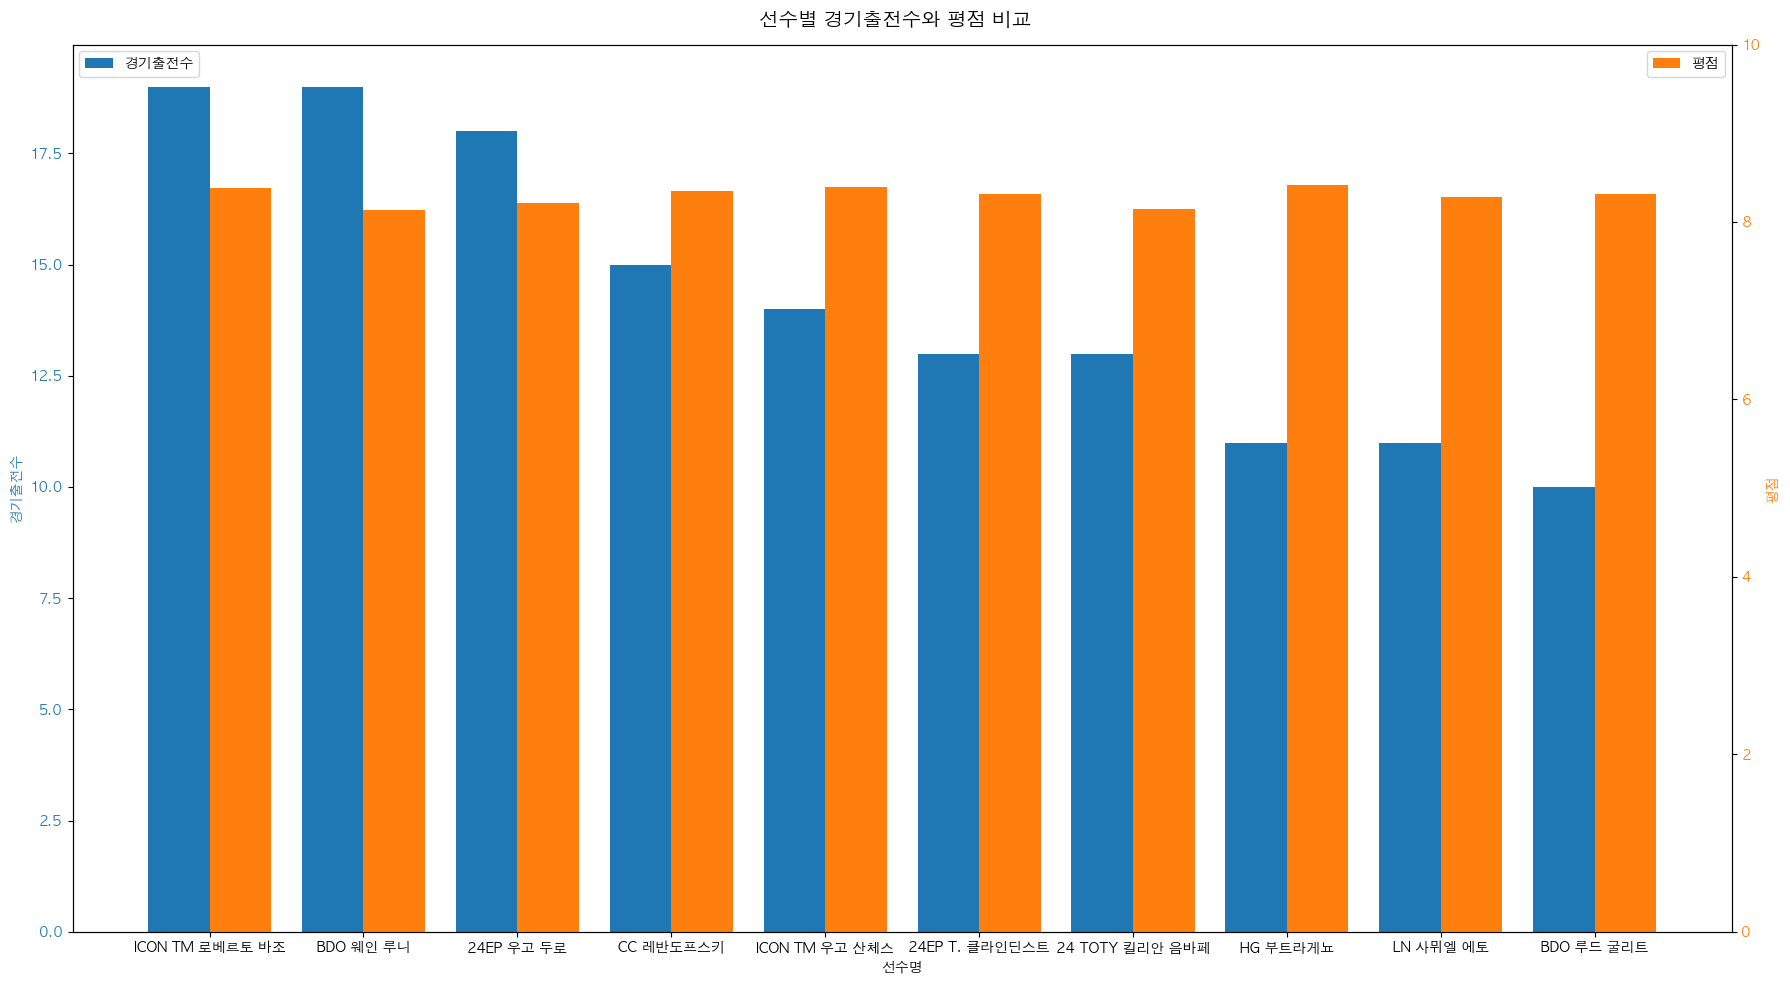

In [49]:
players = tmp_df["season_card"]  # X축 값
matches = tmp_df["count"]  # 첫 번째 Y축 (막대)
ratings = tmp_df["spRating"]  # 두 번째 Y축 (막대)

# 그래프 설정
fig, ax1 = plt.subplots(figsize=(18, 10))  # 그래프 크기 설정

x = np.arange(len(players))
# 첫 번째 막대 (왼쪽 Y축: 경기출전수)
width = 0.4
color1 = 'tab:blue'
ax1.bar(x - width / 2, matches, width, label='경기출전수', color=color1)
# ax1.bar(players, matches, width, label='경기출전수', color=color1, align='center')
ax1.set_ylabel('경기출전수', color=color1)
ax1.tick_params(axis='y', labelcolor=color1)
ax1.set_xlabel('선수명')

# 두 번째 막대 (오른쪽 Y축: 평점)
ax2 = ax1.twinx()  # 두 번째 Y축 생성
color2 = 'tab:orange'
ax2.bar(x + width / 2, ratings, width, label='평점', color=color2)
# ax2.bar(np.arange(len(players)) + width / 2, ratings, width, label='평점', color=color2, align='center')
ax2.set_ylabel('평점', color=color2)
ax2.tick_params(axis='y', labelcolor=color2)
ax2.set_ylim(0, 10)

# 범례 및 제목
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
fig.suptitle('선수별 경기출전수와 평점 비교', fontsize=14)

# X축 설정
ax1.set_xticks(np.arange(len(players)))
ax1.set_xticklabels(players)

# 그래프 출력
plt.tight_layout()
plt.show()

In [ ]:
# tmp_df.to_csv('best.csv')